In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
ds = pd.read_csv('/kaggle/input/titanic/tested.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
ds.shape

(418, 12)

In [4]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

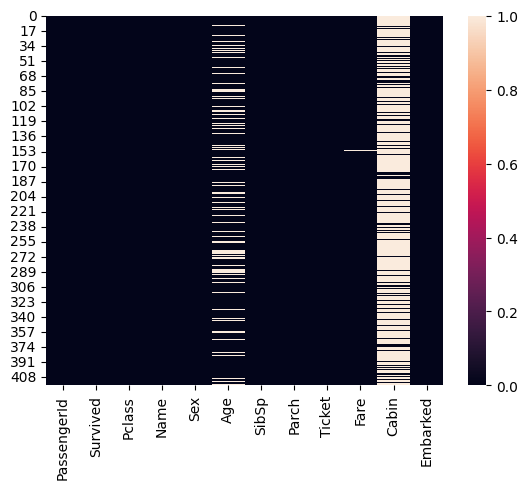

In [7]:
sn.heatmap(ds.isnull());

In [8]:
ds['Age'].replace(np.nan, ds['Age'].mean(), inplace=True)
ds['Fare'].replace(np.nan, ds['Fare'].mean(), inplace=True)
ds.drop('Cabin', axis=1,inplace=True)
ds.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
ds.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [10]:
count_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numb_var = ['Age', 'Fare']

In [11]:
round(ds['Survived'].value_counts(normalize=True)*100, 2)

Survived
0    63.64
1    36.36
Name: proportion, dtype: float64

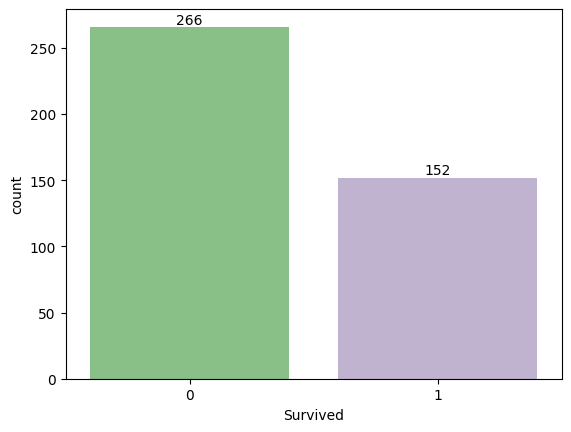

In [12]:
ax = sn.countplot(x=ds['Survived'], palette='Accent')
ax.bar_label(ax.containers[0])
plt.show()

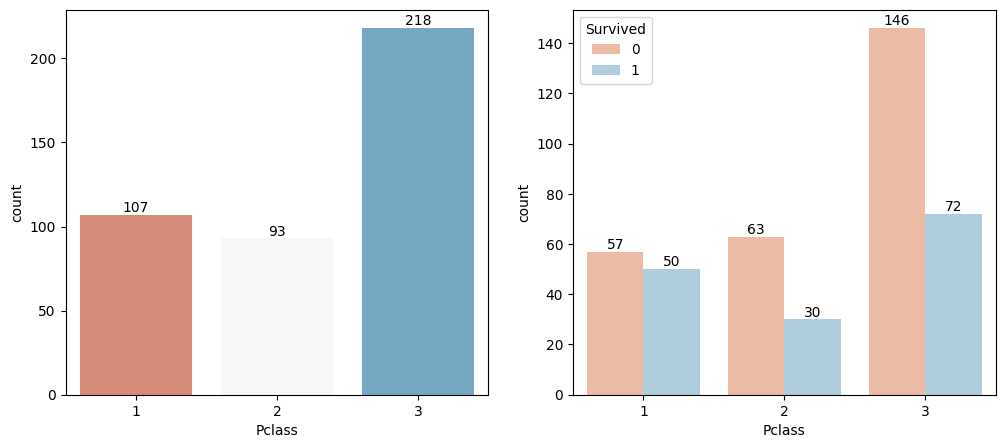

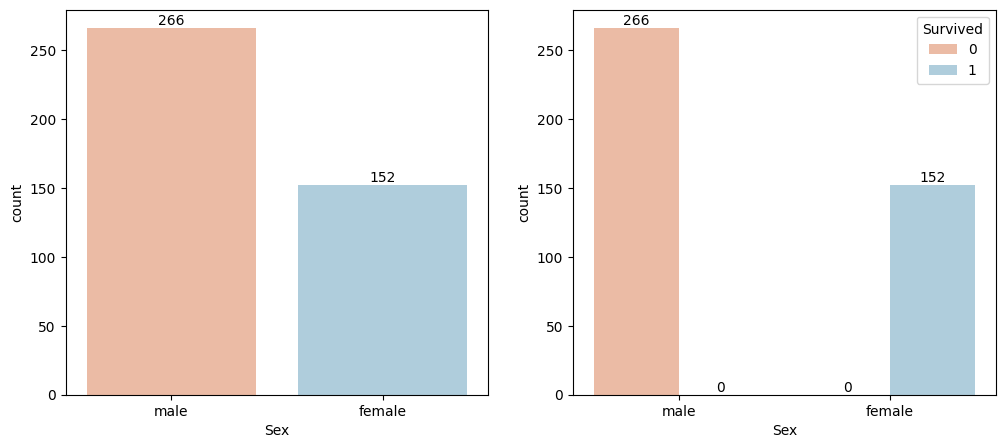

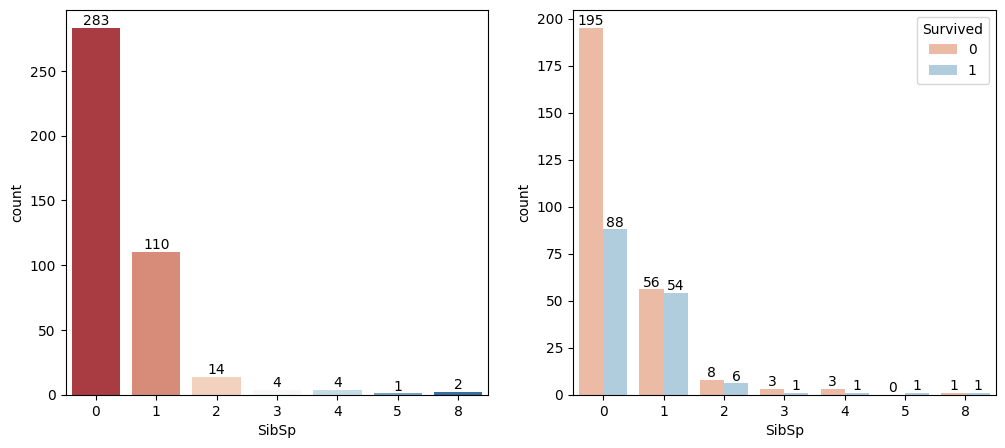

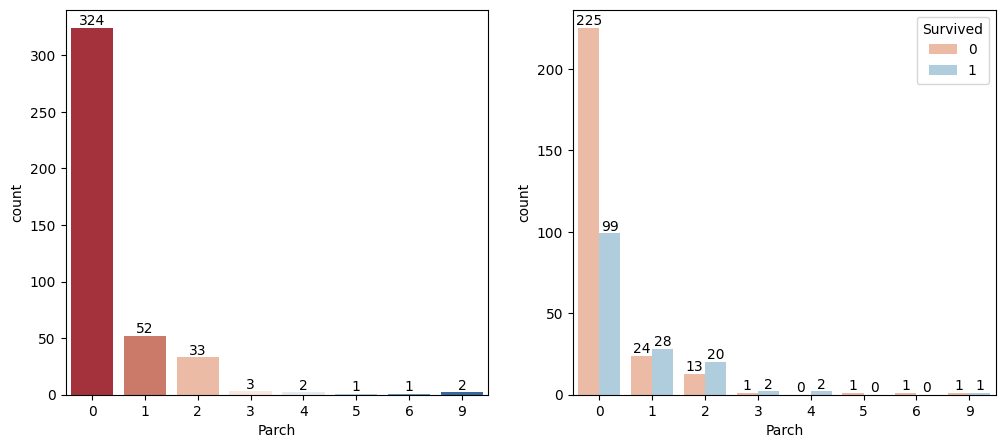

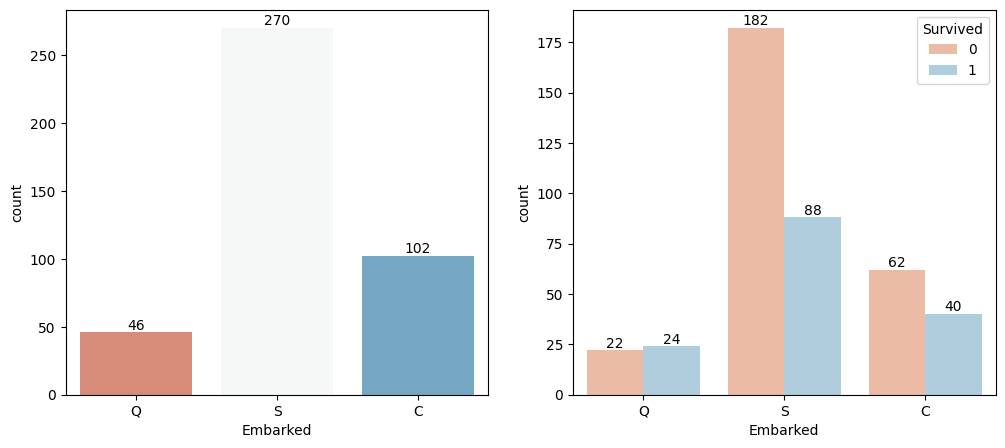

In [13]:
for column in count_var:   
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sn.countplot(x=column, data=ds, palette='RdBu')
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sn.countplot(x=column, data=ds, hue='Survived', palette='RdBu')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

In [14]:
ds[numb_var].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


/tmp/ipykernel_20/1574773631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn.distplot(ds[column])


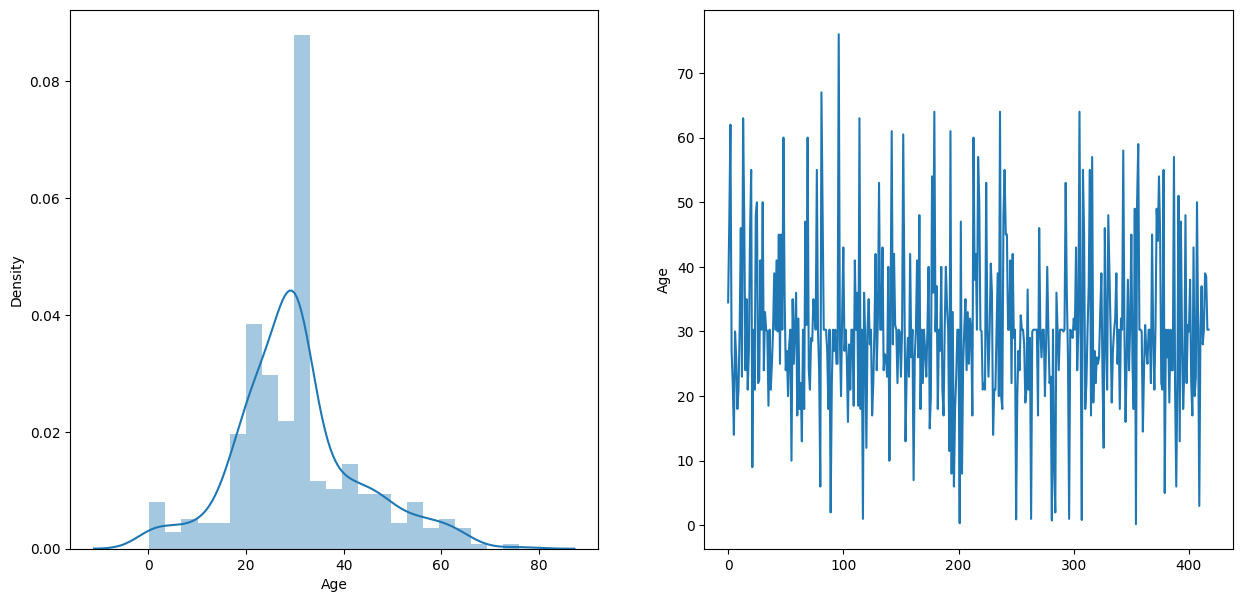

/tmp/ipykernel_20/1574773631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn.distplot(ds[column])


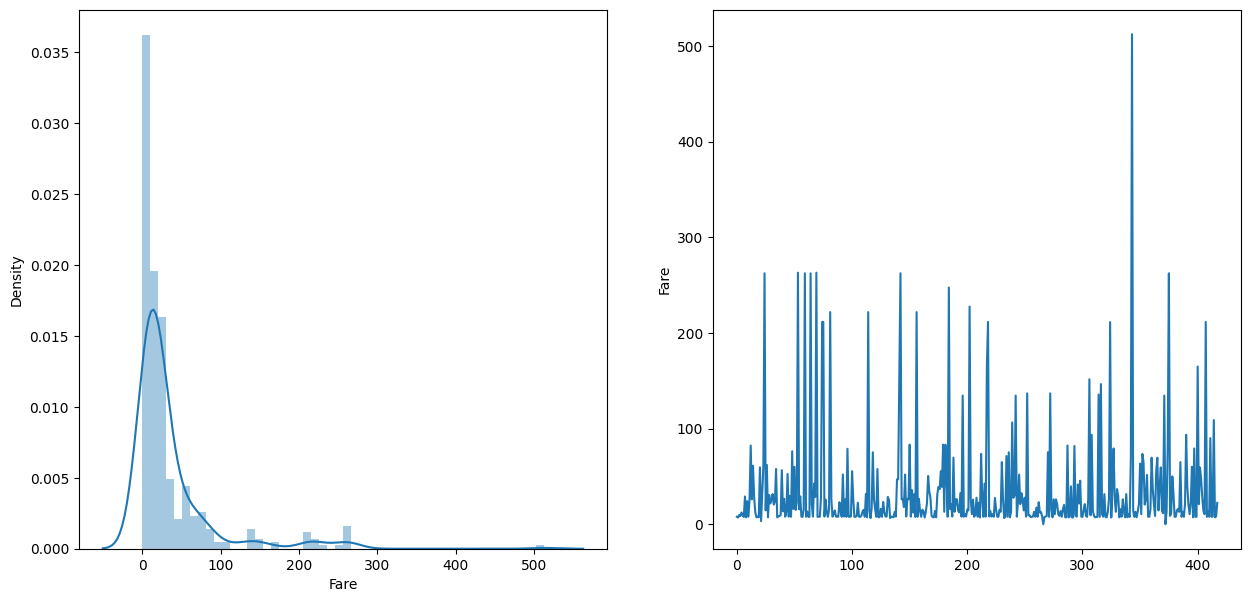

In [15]:
for column in numb_var:
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    ax = sn.distplot(ds[column])

    plt.subplot(1,2,2)
    ax = sn.lineplot(ds[column])
    plt.show()

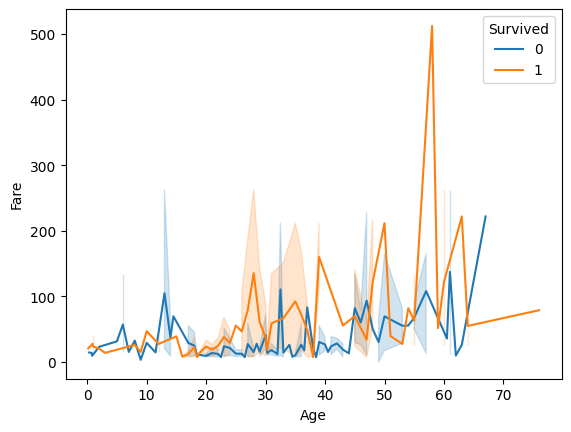

In [16]:
sn.lineplot(data=ds, x='Age', y='Fare', hue='Survived')
plt.show()

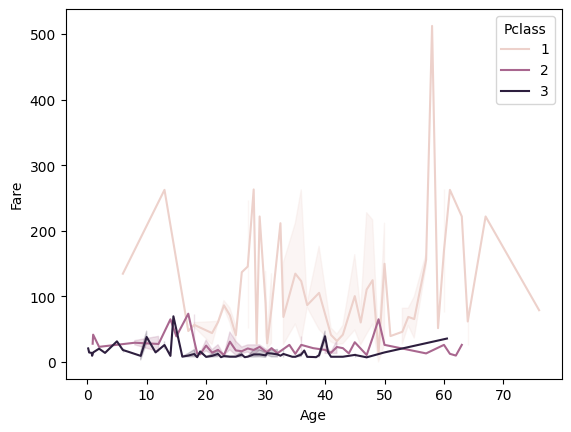

In [17]:
sn.lineplot(data=ds, x='Age', y='Fare', hue='Pclass')
plt.show()

In [18]:
ds_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
ds_update.head()

NameError: name 'df' is not defined

In [ ]:
ds_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
ds_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
ds_update.head()

In [ ]:
print('Summary')
print('1.Only 35% of Passengers survived and 64% of passengers could not survive')
print('2.Males did not survive whereas Females survived')